# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Fakry Gaffar Hakim
- **Email:** m012d4ky2813@bangkit.academy
- **ID Dicoding:** fakryhakim

## About Datasheet


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Dataset characteristics :
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index

dteday : date

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are divided to 41 (max)

atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

for more information please go through the following link:
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 | **Hubungan Kondisi Temperatur/Suhu dan Banyaknya Peminjaman Sepeda**
   
  Bagaimana kondisi Temperatur atau suhu dapat mempengaruhi jumlah sepeda yang disewa ?

- Pertanyaan 2 | **Pengaruh Musim Terhadap Banyaknya Peminjaman Sepeda**

  Apakah terdapat perbedaan pada setiap musimnya terhadap peminjaman sepeda dan apa yang perlu dilakukan perusahaan peminjaman sepeda jika terdapat kenaikan terhadap peminjaman sepeda ?

## Import Semua Packages/Library yang Digunakan

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [83]:
data_day = pd.read_csv('data/day.csv')
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [84]:
data_hour = pd.read_csv('data/hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**#data_day Checking**

In [85]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [86]:
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [87]:
print ('jumlah duplikasi : ', data_day.duplicated().sum())

jumlah duplikasi :  0


In [88]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**#data_hour Checking**

In [89]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [90]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [91]:
print("Jumlah duplikasi: ", data_hour.duplicated().sum())

Jumlah duplikasi:  0


In [92]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **SIMPLE ANALYSIS**
Dari Proses Assessing Data Diatas dapat dilihat bahwa : 

- Tidak terdapat data yang hilang pada kedua data, baik data_day ataupun data_hour

- Tidak terdapat pula baris yang terduplikasi, baik data_day ataupun data_hour

- Terdapat data yang perlu di analisis lebih lanjut, yaitu dteday sebagai objek perlu adanya perubahan menjadi tipe datetime atau data tanggal

### Cleaning Data

**#Cleaning table data_day**

In [93]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**#Fixing data_day**

In [94]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])


In [95]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**#Cleaning table data_hour**

In [96]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**#Fixing data_hour**

In [97]:
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

In [98]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [99]:
Temp_And_Bicycle = data_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
Temp_And_Bicycle

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


**#Simple Analysis**

Dengan Bantuan Teknik Korelasi Pearson, kita dapat menentukan hubungan antar variabel yang diuji. Korelasi Perason sendiri memiliki range -1 hingga 1. Berikut analisis dari data diatas

 - Pada variabel 'temp' dan 'atemp' memiliki nilai 0.991702 atau mendekati 1. Hal tersebut menandakan bahwa terdapat hubungan yang kuat antara 'temp' dan 'atemp'. 'temp' sendiri adalah suhu dan 'atemp' adalah suhu yang terasa.

 - Pada variabel 'temp' dan 'cnt' memiliki nilai 0.627494. Hal tersebut menandakan bahwa semakin tinggi suhu maka semakin banyak sepeda yang disewakan karena dalam korelasi Pearson sendiri ini menandakan korelasi positif.

 - Pada variabel 'hum' dan 'cnt' memiliki nilai -0.100659. Hal tersebut menandakan bahwa semakin tinggi kelembapan maka semakin sedikit sepeda yang disewakan karena dalam korelasi Pearson sendiri ini menandakan korelasi negatif.

 - Pada variabel 'windspeed' dan 'cnt' memiliki nilai -0.234545. Hal tersebut menandakan bahwa semakin tinggi kecepatan angin makan semakin sedikit sepeda yang disewakan karena dalam korelasi Pearson sendiri ini menandakan korelasi negarif. 

In [100]:
musim_peminjam = data_day.groupby('season')['cnt'].sum().reset_index()
print(musim_peminjam)

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


**#Simple Analysis**

Dari data diatas kita dapat melihat bahwa :

- Musim Semi (1)
Jumlah peminjam sepeda adalah 471.348

- Musim Panas (2)
Jumlah peminjam sepeda adalah 918.589

- Musim Gugur (3)
Jumlah peminjam sepeda adalah 1.061.129

- Musim Salju (4)
Jumlah peminjam sepeda adalah 841.613

Dari data tersebut dapat dikatakan bahwa dari musim semi menuju musim gugur mengalami kenaikan yang signifikan, dan dari musim gugur menuju musim salju menujukan penurunan yang tidak terlalu drastis.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana kondisi Temperatur atau suhu dapat mempengaruhi jumlah sepeda yang disewa ?

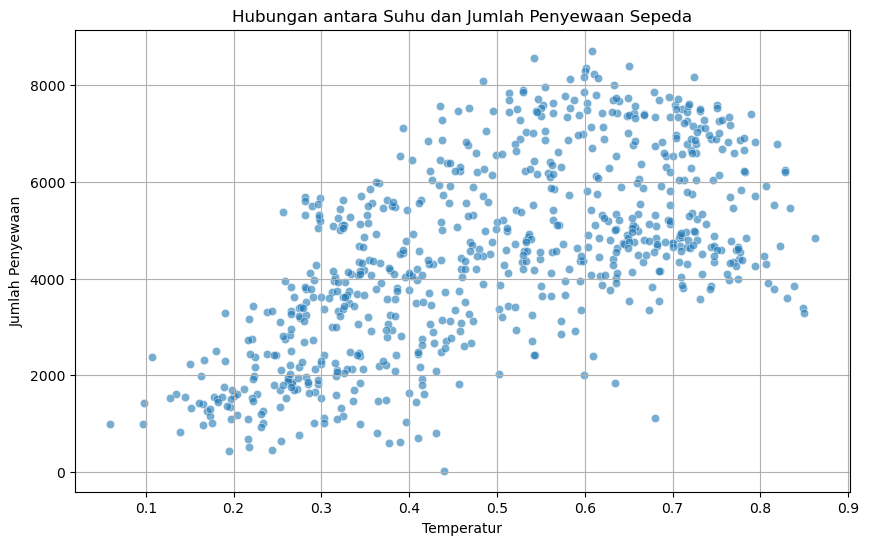

In [101]:
# Scatter plot suhu vs jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data_day, alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

### Pertanyaan 2:
Apakah terdapat perbedaan pada setiap musimnya terhadap peminjaman sepeda dan apa yang perlu dilakukan perusahaan peminjaman sepeda jika terdapat kenaikan terhadap peminjaman sepeda ?

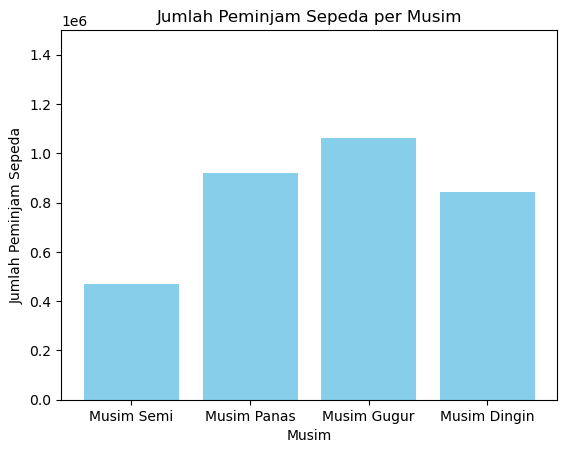

In [102]:
data_day = pd.read_csv('data/day.csv')

musim_peminjam = data_day.groupby('season')['cnt'].sum().reset_index()

# Visualisasi dengan sumbu y dibatasi pada rentang 0 - 1.500.000
plt.bar(musim_peminjam['season'], musim_peminjam['cnt'], color='skyblue')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjam Sepeda')
plt.title('Jumlah Peminjam Sepeda per Musim')
plt.xticks(musim_peminjam['season'], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.ylim(0, 1500000)  # Menentukan rentang sumbu y
plt.show()


**#Description**

- skala jumlah peminjaman sepeda dari 0 - 1.500.000 (1e6)

## Conclusion

- Conclution pertanyaan 1 | **Bagaimana kondisi Temperatur atau suhu dapat mempengaruhi jumlah sepeda yang disewa ?**

Pada proses EDA (Exploratory Data Analysis) dengan menggunakan metode korelasi Pearson dapat dikatakan bahwa terdapat korelasi positif pada variabel 'temp' dan 'cnt' dimana 'temp' sendiri adalah suhu dan 'cnt' adalah jumlah peminjaman. Dimana menjelaskan bahwa jika suhu meningkat maka peminjaman sepeda semakin banyak. Hal ini terlihat pada data hasil perhitungan korelasi Pearson antara variabel 'temp' dan 'cnt' memiliki nilai 0.627494

- Conclution pertanyaan 2 | **Apakah terdapat perbedaan pada setiap musimnya terhadap peminjaman sepeda dan apa yang perlu dilakukan perusahaan peminjaman sepeda jika terdapat kenaikan terhadap peminjaman sepeda ?**

Dapat dilihat dari data banyaknya peminjaman sepeda dari tiap musimnya, terlihat jelas ada kenaikan dari musim semi ke musim gugur sebesar 589.781 dan terdapat penurunan dari musim gugur ke musim salju sebesar  219.516. hal ini dapat menjadi salah satu strategi untuk perusahaan peminjaman sepeda agar mempersiapkan lebih banyak unit sepeda yang dapat dipinjamkan di musim gugur, tetapi jangan terlalu banyak juga dalam penambahan unit sepeda agar pada saat musim salju tidak banyak kerugian yang ditanggung karena terjadi penurunan peminjaman sepeda.
